In [4]:
# Import all necessary librarues
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/healthcare-dataset-stroke-data.csv')

In [8]:
# Understand the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# We can see that there are 201 missing values in the 'bmi' column
# Data preprocessing Starts

# Dealing with missing values
# Fill the missing values in the 'bmi' column with the mean value

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

In [8]:
# Check Duplicate values again.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# Encoding categorical variables into Numerical values

df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [10]:
# Scaling numerical variables for better model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df_encoded[['age', 'avg_glucose_level', 'bmi']])

<Axes: xlabel='stroke', ylabel='count'>

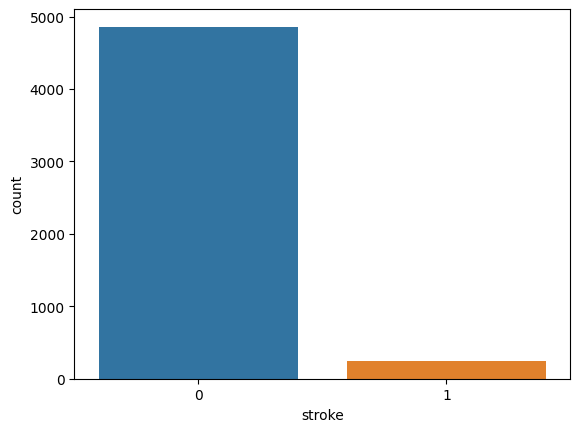

In [11]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df_encoded)

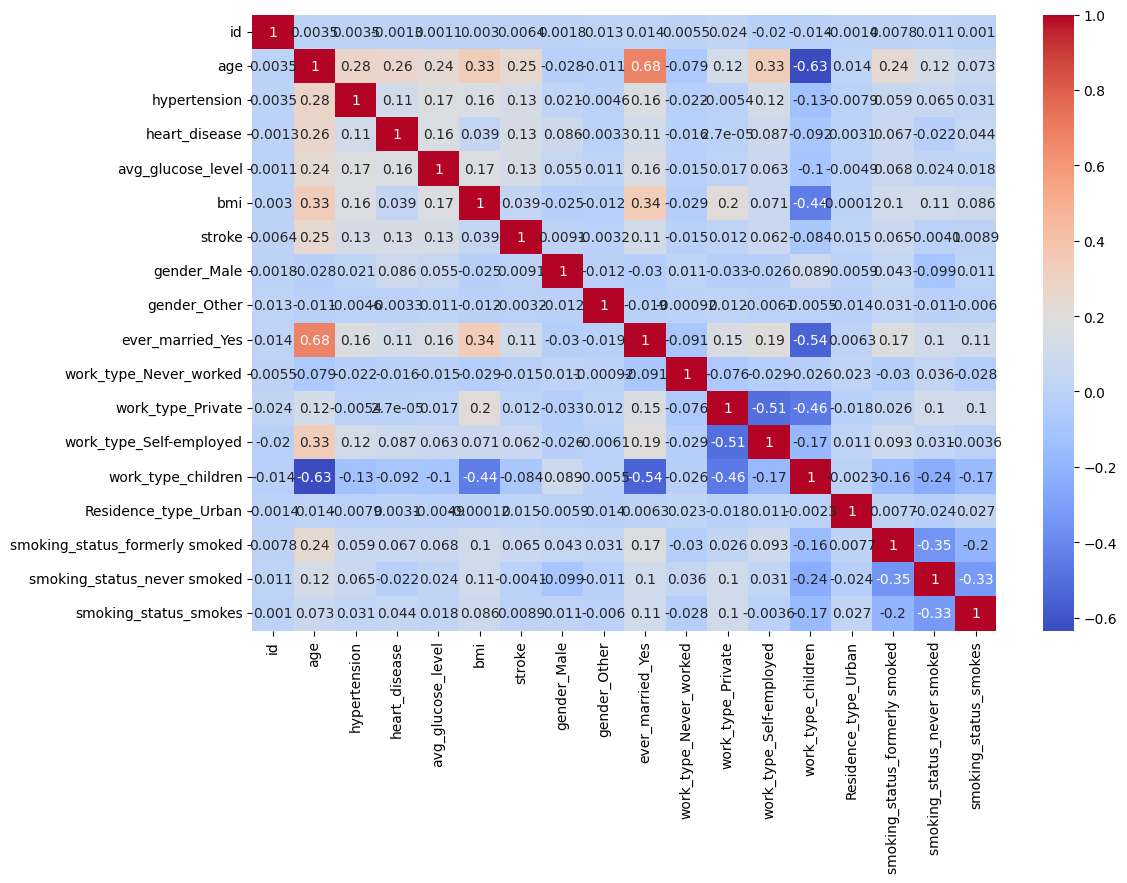

In [12]:
# Dataset is highly imbalanced with only a small fraction of the samples having a stroke.
# Correlation Matrix

corr = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

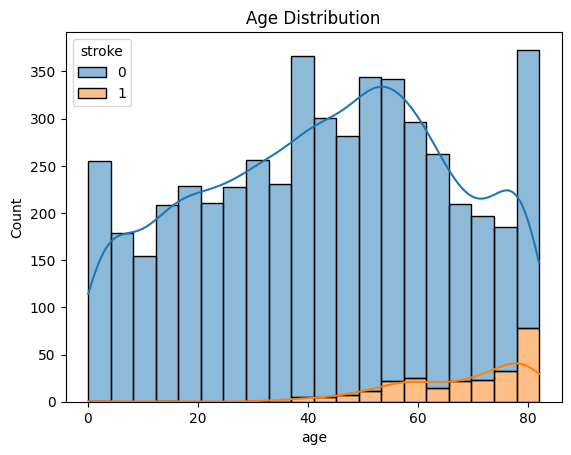

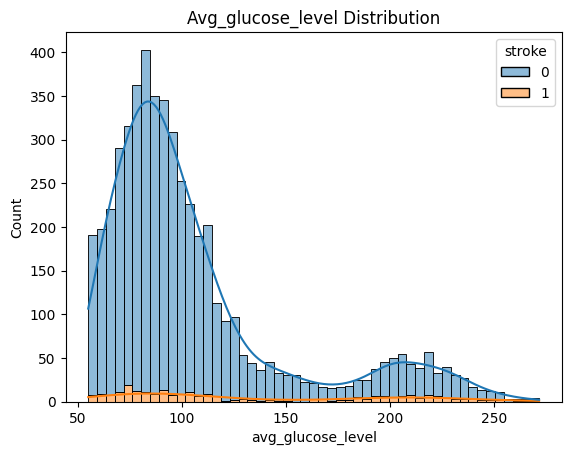

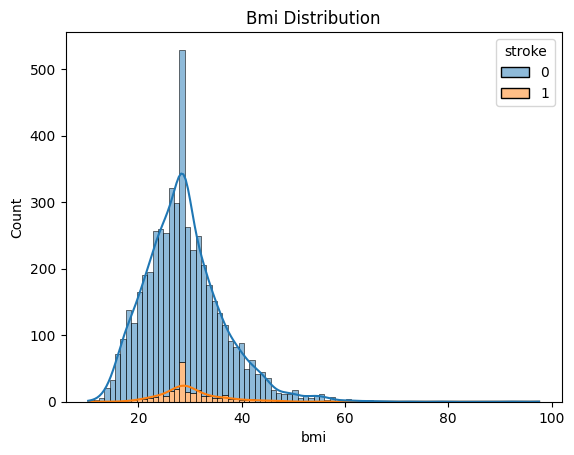

In [13]:
# Plot Individual Histogram for the numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='stroke', kde=True, multiple='stack')
    plt.title(feature.capitalize() + ' Distribution')
    plt.show()

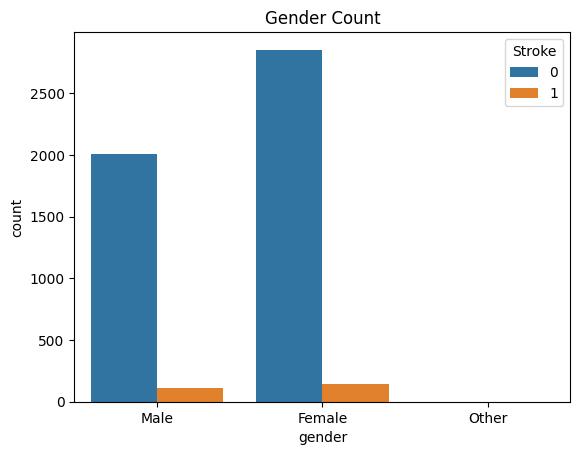

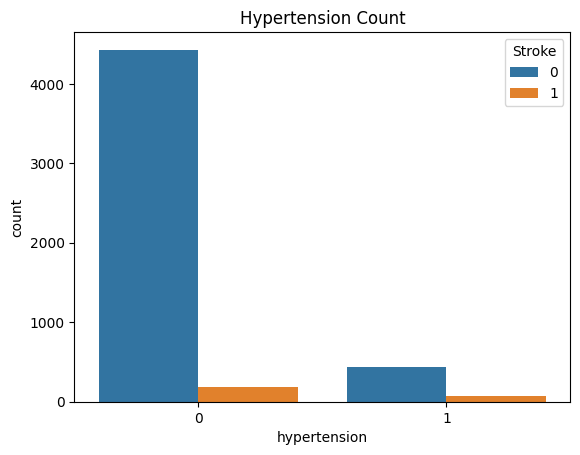

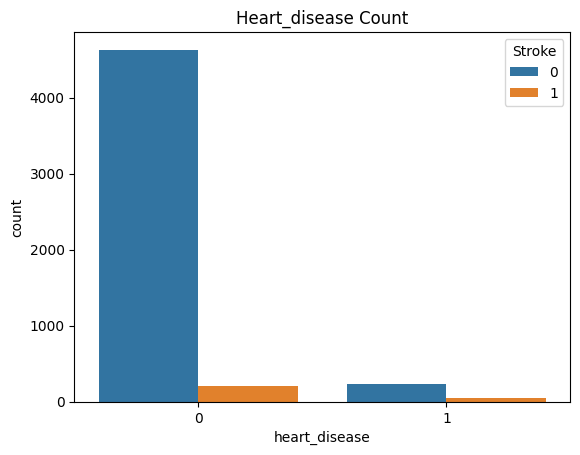

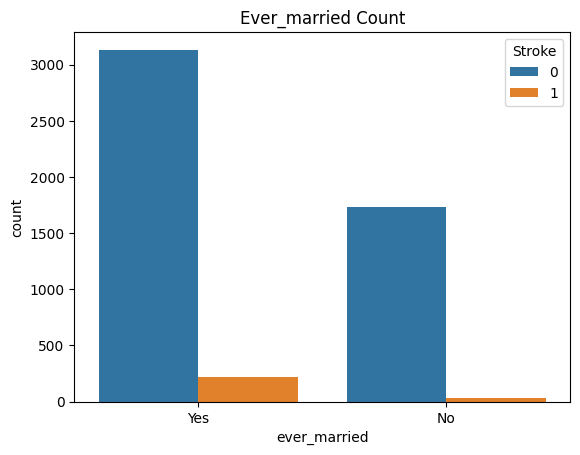

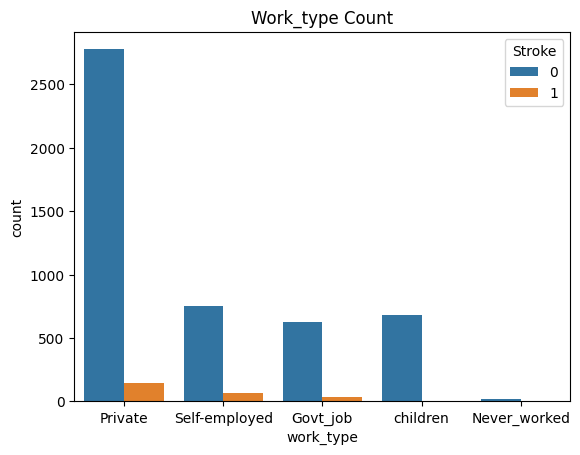

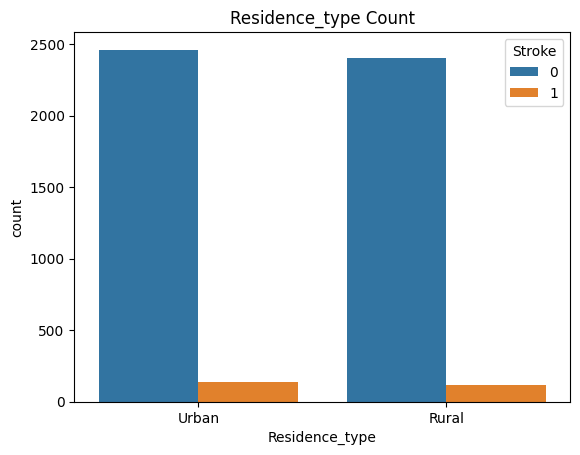

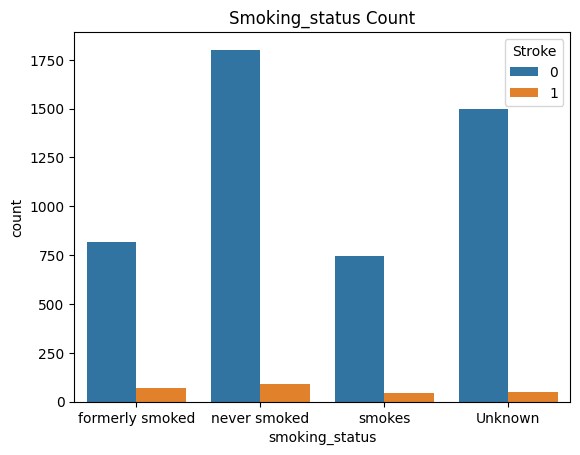

In [14]:
# Plot individual bar charts for categorical features
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in cat_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature.capitalize() + ' Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.show()

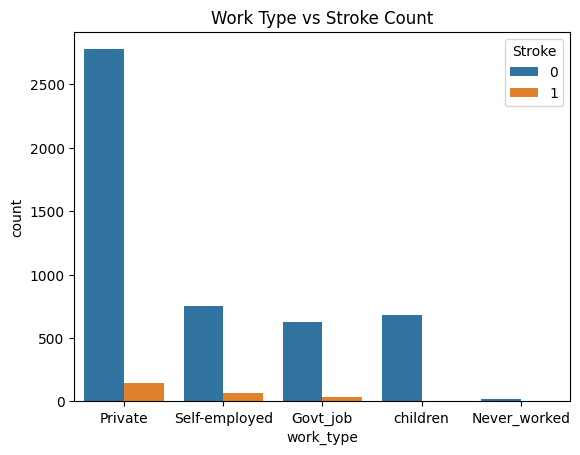

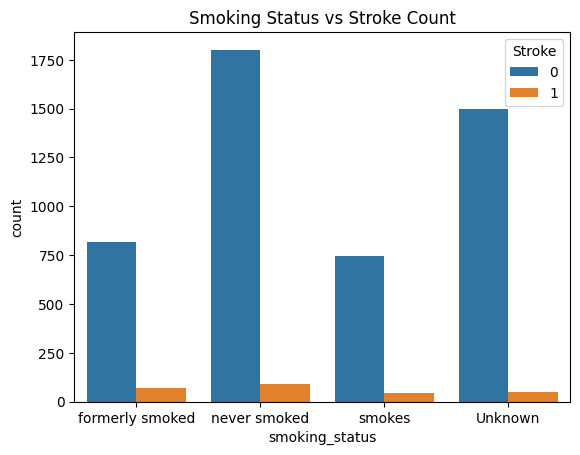

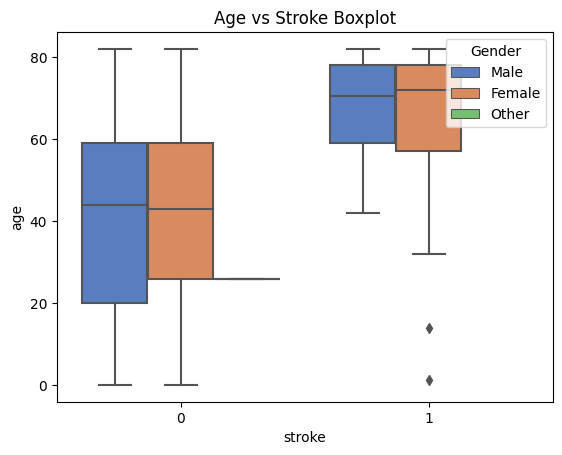

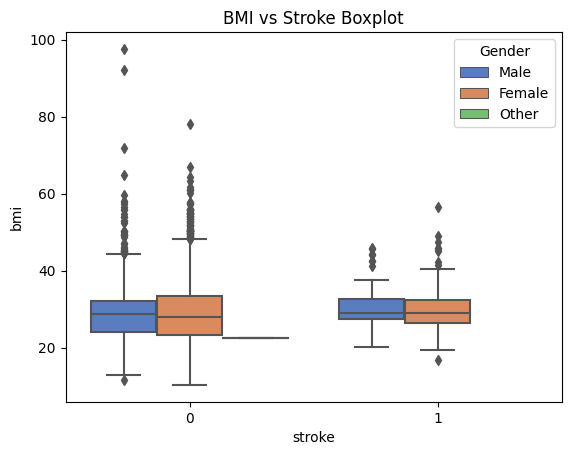

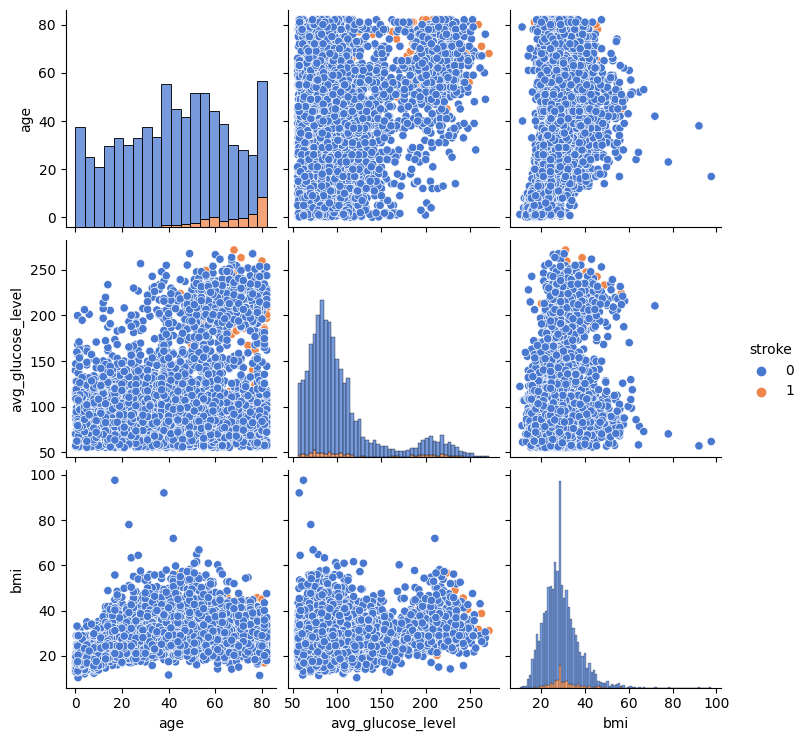

In [15]:
# having a higher chances of strokes (such as 'hypertension', 'heart_disease', and 'smoking_status')
# others having a lower chances of strokes (such as 'ever_married' and 'Residence_type')

# Bar plot for Categorical vs Categorical  features 
# Categorical vs Numerical features( with different colors)
# Numerical vs Numerical feature pair plot


plt.figure()
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Work Type vs Stroke Count')
plt.legend(title='Stroke', loc='upper right')

plt.figure()
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke Count')
plt.legend(title='Stroke', loc='upper right')

# Categorical vs numerical features
plt.figure()
sns.boxplot(data=df, x='stroke', y='age', hue='gender', palette='muted')
plt.title('Age vs Stroke Boxplot')
plt.legend(title='Gender', loc='upper right')

plt.figure()
sns.boxplot(data=df, x='stroke', y='bmi', hue='gender', palette='muted')
plt.title('BMI vs Stroke Boxplot')
plt.legend(title='Gender', loc='upper right')

# Numerical vs numerical features pair plot
num_features = ['age', 'avg_glucose_level', 'bmi']
sns.pairplot(data=df, vars=num_features, hue='stroke', diag_kind='hist', diag_kws={'multiple':'stack'}, palette='muted')

plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply normalization and standardization for numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']

# Apply Min-Max scaling (normalization) to numerical features
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print('\n\n Data after Min-Max scaling:\n\n', df.head())

# Apply z-score standardization to numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print('\n\n Data after z-score standardization:\n\n', df.head())



 Data after Min-Max scaling:

       id  gender       age  hypertension  heart_disease ever_married  \
0   9046    Male  0.816895             0              1          Yes   
1  51676  Female  0.743652             0              0          Yes   
2  31112    Male  0.975586             0              1          Yes   
3  60182  Female  0.597168             0              0          Yes   
4   1665  Female  0.963379             1              0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           0.801265  0.301260  formerly smoked   
1  Self-employed          Rural           0.679023  0.212981     never smoked   
2        Private          Rural           0.234512  0.254296     never smoked   
3        Private          Urban           0.536008  0.276060           smokes   
4  Self-employed          Rural           0.549349  0.156930     never smoked   

   stroke  
0       1  
1       1  
2       1  

In [17]:
# Apply Balancing technique ( SMOTE/ Oversampling / Undersampling ) in this dataset

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert categorical features to numerical using LabelEncoder
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the class distribution
print(df['stroke'].value_counts())

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Over Sampling technique
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print('\n\nAfter Random Over Sampling:\n\n', y_resampled.value_counts())

# Apply Random Under Sampling technique
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print('\n\nAfter Random Under Sampling:\n\n', y_resampled.value_counts())

# Apply SMOTE technique
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print('\n\nAfter SMOTE technique:\n\n', y_resampled.value_counts())

0    4861
1     249
Name: stroke, dtype: int64


After Random Over Sampling:

 0    3901
1    3901
Name: stroke, dtype: int64


After Random Under Sampling:

 0    187
1    187
Name: stroke, dtype: int64


After SMOTE technique:

 0    3006
1    3006
Name: stroke, dtype: int64


In [19]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=f8c4d4d79aab82095394279879ffc205cedd6e81467485

In [20]:
import pandas_profiling


# Generate pandas profiling report
profile = df.profile_report(title="Stroke Prediction Dataset Profile")

# Save the report as an HTML file
profile.to_file("stroke_prediction_dataset_profile.html")

<ipython-input-20-24402d613dff>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
print(os.getcwd())

/content


In [22]:
profile.to_file("/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
from IPython.display import display, HTML

# Specify the path to the HTML file
html_file = '/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html'

# Display the HTML file
display(HTML(filename=html_file))

Number of variables,12
Number of observations,5110
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,0
Duplicate rows (%),0.0%
Total size in memory,479.2 KiB
Average record size in memory,96.0 B
Numeric,4
Categorical,8
age is highly overall correlated with ever_married,High correlation
